In [20]:
from sklearn.externals import joblib
import seaborn as sns
sns.set_context("paper", rc={"font.size":150, "axes.titlesize":15, "axes.labelsize":15})   
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
import scipy
import pprint
import sparse
import os
from collections import defaultdict

# check model

In [43]:
def check_model(exp_names, task_dir, runnames, no_cohort_specific=True):
    '''
    check the result of models
    returns result, val_best_names, val_best
    where result is a df after choosing among validations
    '''
    pds = {}
    for exp_name in exp_names:
        pd_dict = {}
        for run in runnames: 
            try: # figure out what's wrong with somd of the runs
                fn = os.path.join(
                        task_dir,
                        'logs/results/test_auc_on_{}_single_{}.npy'.format(run, exp_name))
                pd_dict[run] = np.load(fn)
                if no_cohort_specific:
                    pd_dict[run] = pd_dict[run][-1:]
            except:
                print("{} missing run {}".format(exp_name, run))
                continue

        df = pd.DataFrame.from_dict(pd_dict)
        df = df.rename({len(pd_dict[0])-1: 'micro auc'}, axis='index')    
        pds[exp_name] = df.transpose()

    for exp_name in exp_names:
        print('\n' + exp_name)
        print(pds[exp_name].describe().round(3))
    
    ### second part: choose from best validation 
    pd_dict = {}
    val_best = {}
    val_best_name = {}
    for exp_name in exp_names:
        for run in runnames:
            val_fn = os.path.join(
                        task_dir,
                        'logs/results/val_auc_on_{}_single_{}.npy'.format(run, exp_name))                
            test_fn = os.path.join(
                         task_dir,
                         'logs/results/test_auc_on_{}_single_{}.npy'.format(run, exp_name))                
            
            try: # figure out what's wrong with some of the runs
                val_micro_auc = np.load(val_fn)[-1]
                np.load(test_fn)
            except:
                print("{} missing run {}".format(exp_name, run))
                continue

            if not val_best.get(exp_name) or val_best[exp_name] < val_micro_auc:
                val_best[exp_name] = val_micro_auc
                val_best_name[exp_name] = test_fn

                pd_dict[exp_name] = np.load(val_best_name[exp_name])
                if no_cohort_specific:
                    pd_dict[exp_name] = pd_dict[exp_name][-1:]

    df = pd.DataFrame.from_dict(pd_dict)
    df = df.rename({len(df.index)-1: 'micro auc'}, axis='index')    
    return df, val_best_name, val_best    

In [48]:
exp_names = ['moe_exp', 'global_exp']
task_dir = 'eicu_mixture_of_experts_project/mortality/'
runnames = list(range(10))
result, val_best_name, val_best = check_model(exp_names, task_dir, runnames)

pprint.pprint(val_best)
pprint.pprint(val_best_name)
print(task_dir)
result.round(3)


moe_exp
       micro auc
count     10.000
mean       0.840
std        0.003
min        0.835
25%        0.838
50%        0.840
75%        0.842
max        0.844

global_exp
       micro auc
count     10.000
mean       0.841
std        0.004
min        0.833
25%        0.839
50%        0.842
75%        0.844
max        0.846
{'global_exp': 0.8419263905155471, 'moe_exp': 0.8413096852999782}
{'global_exp': 'eicu_mixture_of_experts_project/mortality/logs/results/test_auc_on_1_single_global_exp.npy',
 'moe_exp': 'eicu_mixture_of_experts_project/mortality/logs/results/test_auc_on_4_single_moe_exp.npy'}
eicu_mixture_of_experts_project/mortality/


,global_exp,moe_exp
micro auc,0.846,0.844


In [64]:
exp_names = ['moe_exp', 'global_exp']
task_dir = 'eicu_mixture_of_experts_project/ARF4/'
runnames = list(range(30))
result, val_best_name, val_best = check_model(exp_names, task_dir, runnames)

pprint.pprint(val_best)
pprint.pprint(val_best_name)
print(task_dir)
result.round(3)


moe_exp
       micro auc
count     30.000
mean       0.804
std        0.027
min        0.735
25%        0.806
50%        0.817
75%        0.819
max        0.824

global_exp
       micro auc
count     30.000
mean       0.810
std        0.022
min        0.729
25%        0.813
50%        0.817
75%        0.820
max        0.825
{'global_exp': 0.8298258015361704, 'moe_exp': 0.8307454458213637}
{'global_exp': 'eicu_mixture_of_experts_project/ARF4/logs/results/test_auc_on_22_single_global_exp.npy',
 'moe_exp': 'eicu_mixture_of_experts_project/ARF4/logs/results/test_auc_on_14_single_moe_exp.npy'}
eicu_mixture_of_experts_project/ARF4/


,global_exp,moe_exp
micro auc,0.825,0.824


In [50]:
exp_names = ['moe_exp', 'global_exp']
task_dir = 'eicu_mixture_of_experts_project/Shock4/'
runnames = list(range(10))
result, val_best_name, val_best = check_model(exp_names, task_dir, runnames)

pprint.pprint(val_best)
pprint.pprint(val_best_name)
print(task_dir)
result.round(3)


moe_exp
       micro auc
count     10.000
mean       0.853
std        0.006
min        0.841
25%        0.851
50%        0.852
75%        0.857
max        0.861

global_exp
       micro auc
count     10.000
mean       0.853
std        0.005
min        0.845
25%        0.850
50%        0.852
75%        0.858
max        0.861
{'global_exp': 0.855630884853523, 'moe_exp': 0.8558407175346986}
{'global_exp': 'eicu_mixture_of_experts_project/Shock4/logs/results/test_auc_on_5_single_global_exp.npy',
 'moe_exp': 'eicu_mixture_of_experts_project/Shock4/logs/results/test_auc_on_5_single_moe_exp.npy'}
eicu_mixture_of_experts_project/Shock4/


,global_exp,moe_exp
micro auc,0.861,0.86


# plot logs

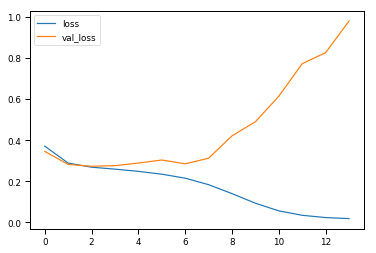

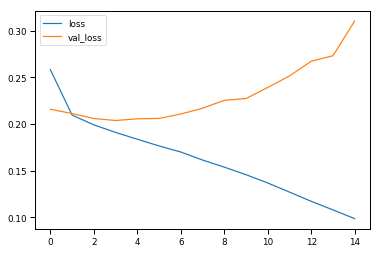

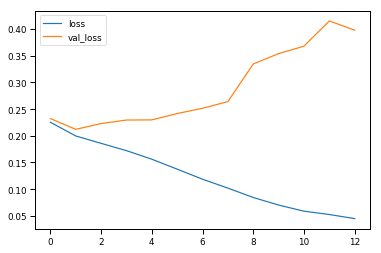

In [63]:
def plot_log(fn):
    logs = joblib.load(fn)
    loss = [item['loss'] for item in logs]
    val_loss = [item['val_loss'] for item in logs]
    plt.plot(loss, label='loss')
    plt.plot(val_loss, label='val_loss')
    plt.legend()
    plt.show()
        
plot_log('eicu_mixture_of_experts_project/mortality/logs/checkpoints/2_global_exp/log')
plot_log('eicu_mixture_of_experts_project/ARF4/logs/checkpoints/9_global_exp/log')
plot_log('eicu_mixture_of_experts_project/Shock4/logs/checkpoints/6_global_exp/log')

# check data

In [2]:
save_data_path = "mixture_of_experts_project/data/mortality_24/"
X = np.load(save_data_path + 'X.npy')
# jw: need to allow_pickle=True                                                                                                                                                                                 
careunits = np.load(save_data_path + 'careunits.npy', allow_pickle=True)
saps_quartile = np.load(save_data_path + 'saps_quartile.npy')
subject_ids = np.load(save_data_path + 'subject_ids.npy')
Y = np.load(save_data_path + 'Y.npy')

pd_dict = {}
all_tasks = sorted(np.unique(careunits))
for task in all_tasks:
    subset = (careunits == task)
    n_samples = sum(subset)
    n_pos_samples = sum(Y[subset])
    pd_dict[task] = {'N': n_samples, 'n': n_pos_samples, 'Class Imbalance': float(n_pos_samples) / n_samples}

df = pd.DataFrame.from_dict(pd_dict).T
df2 = pd.DataFrame.from_dict({'Overall': {'N': len(Y), 'n': sum(Y), 'Class Imbalance': float(sum(Y)) / len(Y)}}).T
df = df.append(df2)
df[['N', 'n']].astype(int)

,N,n
CCU,4888,340
CSRU,6977,136
MICU,11429,1120
SICU,5183,398
TSICU,4234,284
Overall,32711,2278


# inspect hyperparameters

In [31]:
def get_val_dfs(exp_names=['moe_exp', 'global_exp'], 
                task_dir='mixture_of_experts_project/result', 
                runnames=range(10)):
    # get validation performance
    pds = {}
    for exp_name in exp_names:
        pd_dict = {}
        for run in runnames:
            pd_dict[run] =np.load(os.path.join(
                task_dir,
                'logs/results/val_auc_on_{}_single_{}.npy'.format(run, exp_name)))   
        df = pd.DataFrame.from_dict(pd_dict)
        df = df.rename({len(pd_dict[0])-1: 'micro auc'}, axis='index')
        pds[exp_name] = df.transpose()

    return pds

def get_settings_df(task_dir='mixture_of_experts_project/result'):
    # plot partial dependence of all the hyper-parameters, based on validation performance
    fn = os.path.join(task_dir, 'settings/cluster_model_settings.pkl')
    cluster_settings, model_settings = joblib.load(fn)
    pd_dict = defaultdict(lambda: np.zeros(len(cluster_settings)))
    for i, setting in enumerate(zip(cluster_settings, model_settings)):
        cluster_setting, model_setting = setting

        for arg in cluster_setting:
            if type(arg) in [list, tuple]:
                k, v = arg
            else:
                k, v = arg, 1
            if k.startswith('--'):
                k = k[2:]
            elif k.startswith('-'):
                k = k[1:]

            if k == 'lr':
                k = 'log_lr'
                v = np.log10(v)
            if k == 'wd':
                k = 'log_wd'
                v = np.log10(v)
            if type(v) is str: continue
            pd_dict['cluster_' + str(k)][i] = v

        for arg in model_setting:
            if type(arg) in [list, tuple]:
                k, v = arg
            else:
                k, v = arg, 1
            if k.startswith('--'):
                k = k[2:]
            elif k.startswith('-'):
                k = k[1:]

            if k == 'lr':
                k = 'log_lr'
                v = np.log10(v)
            if k == 'wd':
                k = 'log_wd'
                v = np.log10(v)
            if type(v) is str: continue
            pd_dict['model_' + str(k)][i] = v

    settings_df = pd.DataFrame.from_dict(pd_dict)
    return settings_df

def plot_hp_dependence(val_dfs, settings_df, exp_name):
    plt.figure(figsize=(20,20))
    for i, c in enumerate(settings_df.columns):
        n = int(np.ceil(np.sqrt(len(settings_df.columns))))
        plt.subplot(n, n, i+1)
        idx = val_dfs[exp_name]['micro auc'].index
        sns.regplot(x=settings_df[c][idx], y=val_dfs[exp_name]['micro auc'], fit_reg=True)
        # plt.tight_layout()
    plt.show()

global_exp


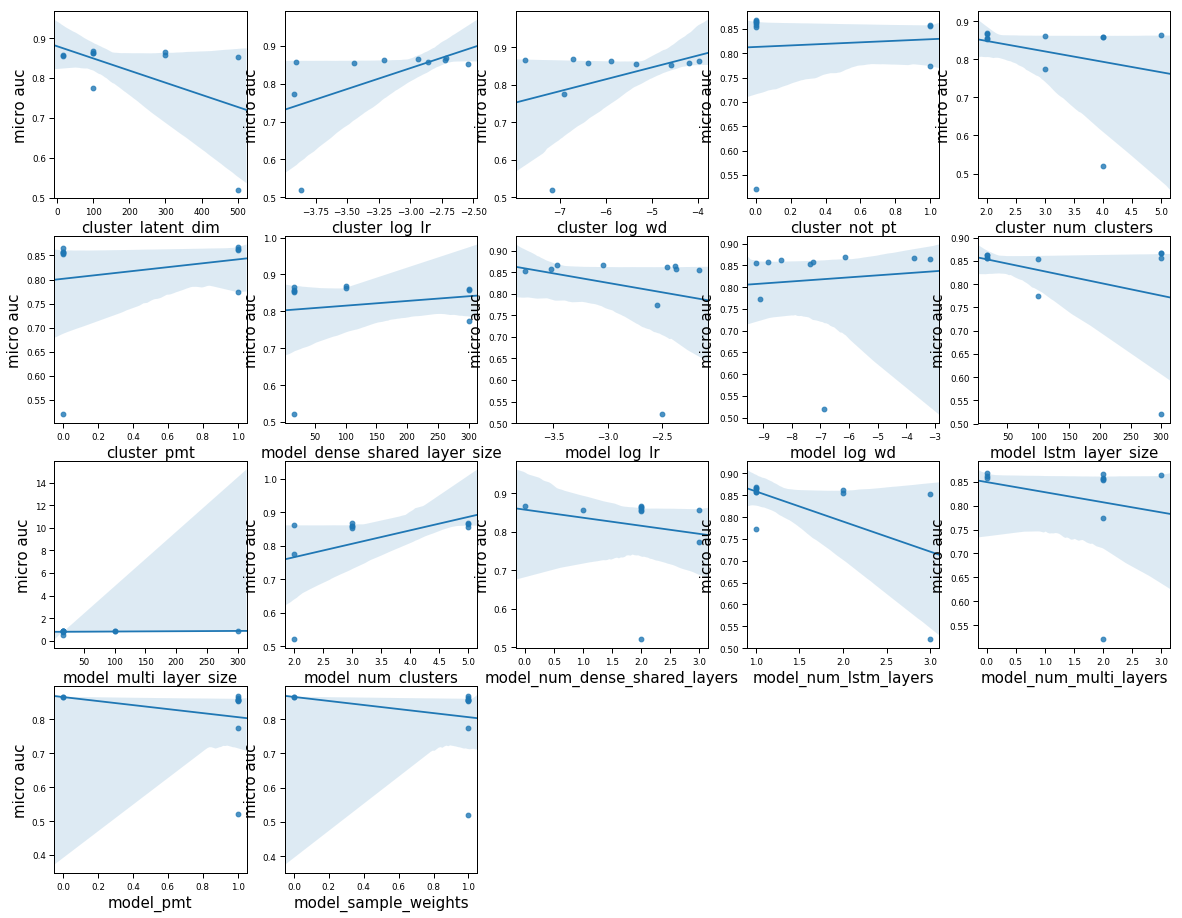

In [37]:
exp_names = ['global_exp',]
task_dir = 'mixture_of_experts_project/result'
runnames = list(range(10))

val_dfs = get_val_dfs(exp_names, task_dir, runnames)
settings_df = get_settings_df(task_dir)

for exp_name in exp_names:
    print(exp_name)
    plot_hp_dependence(val_dfs, settings_df, exp_name)